# Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Dataset is currently on Google Drive. 
# To rerun notebook, uncomment the read_csv lines of code below and read directly from your copy of dataset
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


Access dataset [here](https://www.kaggle.com/competitions/learning-equality-curriculum-recommendations/data)

## Files and Fields 

### `topics.csv`

In [3]:
topics_df = pd.read_csv("/content/drive/My Drive/A_ELEC_UBC/Year4/Elec400m/Final Report/Code/Data/topics.csv")
#topics_df = pd.read_csv("Code/Data/topics.csv")

In [4]:
topics_df.head(5)

,id,title,description,channel,category,level,language,parent,has_content
0,t_00004da3a1b2,Откриването на резисторите,"Изследване на материали, които предизвикват на...",000cf7,source,4,bg,t_16e29365b50d,True
1,t_000095e03056,Unit 3.3 Enlargements and Similarities,NaN,b3f329,aligned,2,en,t_aa32fb6252dc,False
2,t_00068291e9a4,Entradas e saídas de uma função,Entenda um pouco mais sobre funções.,8e286a,source,4,pt,t_d14b6c2a2b70,True
3,t_00069b63a70a,Transcripts,NaN,6e3ba4,source,3,en,t_4054df11a74e,True
4,t_0006d41a73a8,Графики на експоненциални функции (Алгебра 2 н...,Научи повече за графиките на сложните показате...,000cf7,source,4,bg,t_e2452e21d252,True


### `content.csv`

In [5]:
content_df = pd.read_csv("/content/drive/My Drive/A_ELEC_UBC/Year4/Elec400m/Final Report/Code/Data/content.csv")
#content_df = pd.read_csv("Code/Data/content.csv")

In [6]:
content_df.head(5)

,id,title,description,kind,text,language,copyright_holder,license
0,c_00002381196d,"Sumar números de varios dígitos: 48,029+233,930","Suma 48,029+233,930 mediante el algoritmo está...",video,NaN,es,NaN,NaN
1,c_000087304a9e,Trovare i fattori di un numero,Sal trova i fattori di 120.\n\n,video,NaN,it,NaN,NaN
2,c_0000ad142ddb,Sumar curvas de demanda,Cómo añadir curvas de demanda\n\n,video,NaN,es,NaN,NaN
3,c_0000c03adc8d,Nado de aproximação,Neste vídeo você vai aprender o nado de aproxi...,document,\nNado de aproximação\nSaber nadar nas ondas ...,pt,Sikana Education,CC BY-NC-ND
4,c_00016694ea2a,geometry-m3-topic-a-overview.pdf,geometry-m3-topic-a-overview.pdf,document,Estándares Comunes del Estado de Nueva York\n\...,es,Engage NY,CC BY-NC-SA


### `correlations.csv` 

In [7]:
correlations_df = pd.read_csv("/content/drive/My Drive/A_ELEC_UBC/Year4/Elec400m/Final Report/Code/Data/correlations.csv")
#correlations_df = pd.read_csv("Code/Data/correlations.csv")

In [8]:
correlations_df.head(3)

,topic_id,content_ids
0,t_00004da3a1b2,c_1108dd0c7a5d c_376c5a8eb028 c_5bc0e1e2cba0 c...
1,t_00068291e9a4,c_639ea2ef9c95 c_89ce9367be10 c_ac1672cdcd2c c...
2,t_00069b63a70a,c_11a1dc0bfb99


### `sample_submission.csv`
A submission file in the correct format.

In [9]:
sample_submission_df = pd.read_csv("/content/drive/My Drive/A_ELEC_UBC/Year4/Elec400m/Final Report/Code/Data/sample_submission.csv")
#sample_submission_df = pd.read_csv("Code/Data/sample_submission.csv")

In [10]:
sample_submission_df.head(3)

,topic_id,content_ids
0,t_00004da3a1b2,c_1108dd0c7a5d c_376c5a8eb028 c_5bc0e1e2cba0 c...
1,t_00068291e9a4,c_639ea2ef9c95 c_89ce9367be10 c_ac1672cdcd2c c...
2,t_00069b63a70a,c_11a1dc0bfb99


# Data Pre-processing

## Separate X (`content_ids`) from y(`topic_ids`)

In [11]:
# get topic_ids and their corresponding content_ids as numpy arrays
correlations_topic_ids = correlations_df.iloc[:,:-1].values
correlations_content_ids = correlations_df.iloc[:,1:2].values

In [12]:
len(correlations_content_ids)

61517

In [13]:
correlations_topic_ids = correlations_topic_ids[0:1000]
correlations_content_ids = correlations_content_ids[0:1000]

In [14]:
print(f"topic_ids:\n {correlations_topic_ids[0:5]}")
print(f"Corresponding content ids:\n {correlations_content_ids[0:5]}")

topic_ids:
 [['t_00004da3a1b2']
 ['t_00068291e9a4']
 ['t_00069b63a70a']
 ['t_0006d41a73a8']
 ['t_0008768bdee6']]
Corresponding content ids:
 [['c_1108dd0c7a5d c_376c5a8eb028 c_5bc0e1e2cba0 c_76231f9d0b5e']
 ['c_639ea2ef9c95 c_89ce9367be10 c_ac1672cdcd2c c_ebb7fdf10a7e']
 ['c_11a1dc0bfb99']
 ['c_0c6473c3480d c_1c57a1316568 c_5e375cf14c47 c_b972646631cb c_d7a0d7eaf799']
 ['c_34e1424229b4 c_7d1a964d66d5 c_aab93ee667f4']]


In [15]:
content_ids = np.array([[0]])
topic_ids = np.array([[0]])

i = 0
while i<len(correlations_topic_ids):
  topic_id = correlations_topic_ids[i][0]
  # print(topic_id)
  content_ids_string = correlations_content_ids[i][0] #string of space separated content ids
  content_ids_arr = content_ids_string.split(" ")
  j = 0
  while (j<len(content_ids_arr)):
    content_id = content_ids_arr[j]
    # print(content_id)
    content_ids = np.append(content_ids,np.array([[content_id]]),axis=0)  
    topic_ids = np.append(topic_ids,np.array([[topic_id]]),axis=0)
    j += 1
  i += 1

# remove the first zeros added when creating arrays
content_ids = content_ids[1:]
topic_ids = topic_ids[1:]

In [16]:
print(f"Content ids numpy array: \n{content_ids},\nTopic ids numpy array: \n{topic_ids}")

Content ids numpy array: 
[['c_1108dd0c7a5d']
 ['c_376c5a8eb028']
 ['c_5bc0e1e2cba0']
 ...
 ['c_9b6a3221cc9d']
 ['c_187f923aedef']
 ['c_d9f1eb259ff1']],
Topic ids numpy array: 
[['t_00004da3a1b2']
 ['t_00004da3a1b2']
 ['t_00004da3a1b2']
 ...
 ['t_045ed925d7eb']
 ['t_0460a35757fe']
 ['t_0460a35757fe']]


In [17]:
#Denote content_id as X and corresponding topic_ids as y 
X = content_ids    #independent variable array
y = topic_ids  #dependent variable array

In [18]:
X[0:5]

array([['c_1108dd0c7a5d'],
       ['c_376c5a8eb028'],
       ['c_5bc0e1e2cba0'],
       ['c_76231f9d0b5e'],
       ['c_639ea2ef9c95']], dtype='<U21')

In [19]:
y[0:5]

array([['t_00004da3a1b2'],
       ['t_00004da3a1b2'],
       ['t_00004da3a1b2'],
       ['t_00004da3a1b2'],
       ['t_00068291e9a4']], dtype='<U21')

## Data visualization


### Missing values

In [20]:
import missingno as msno 

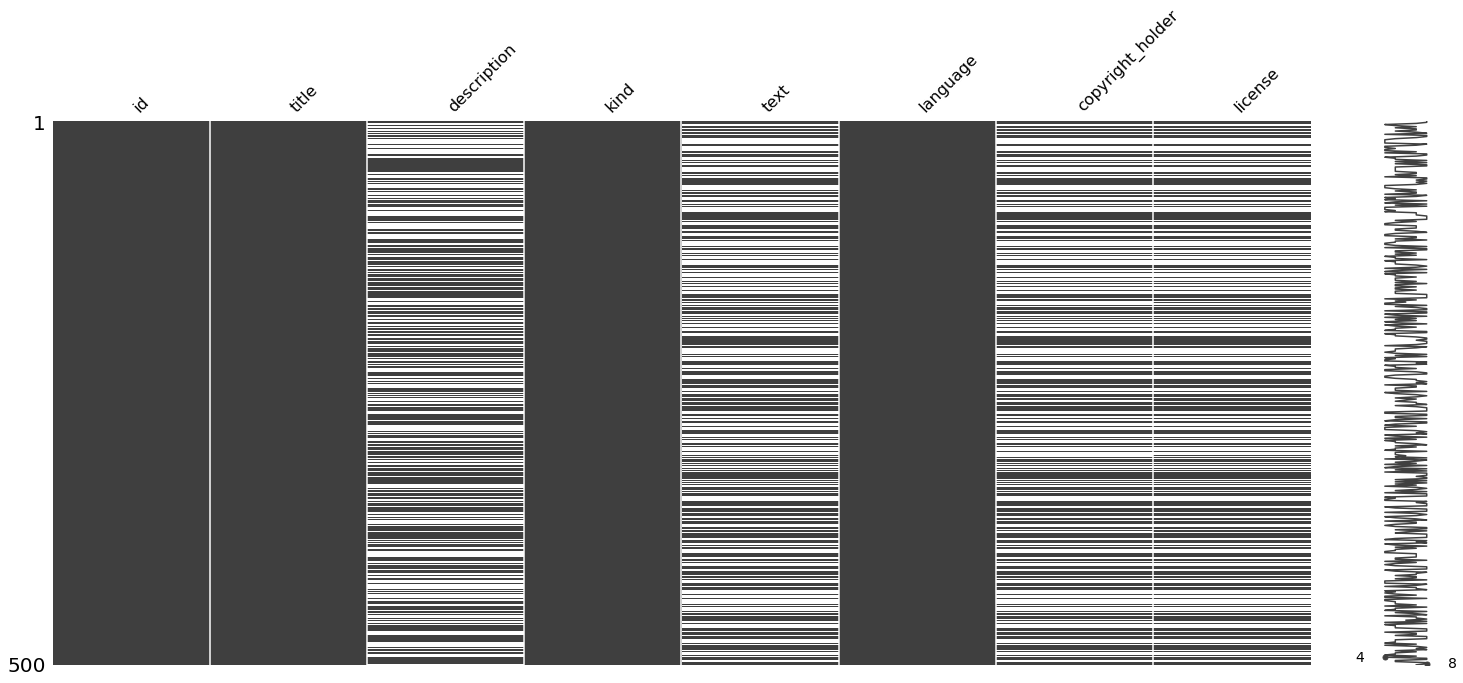

In [21]:
msno.matrix(content_df.sample(500))

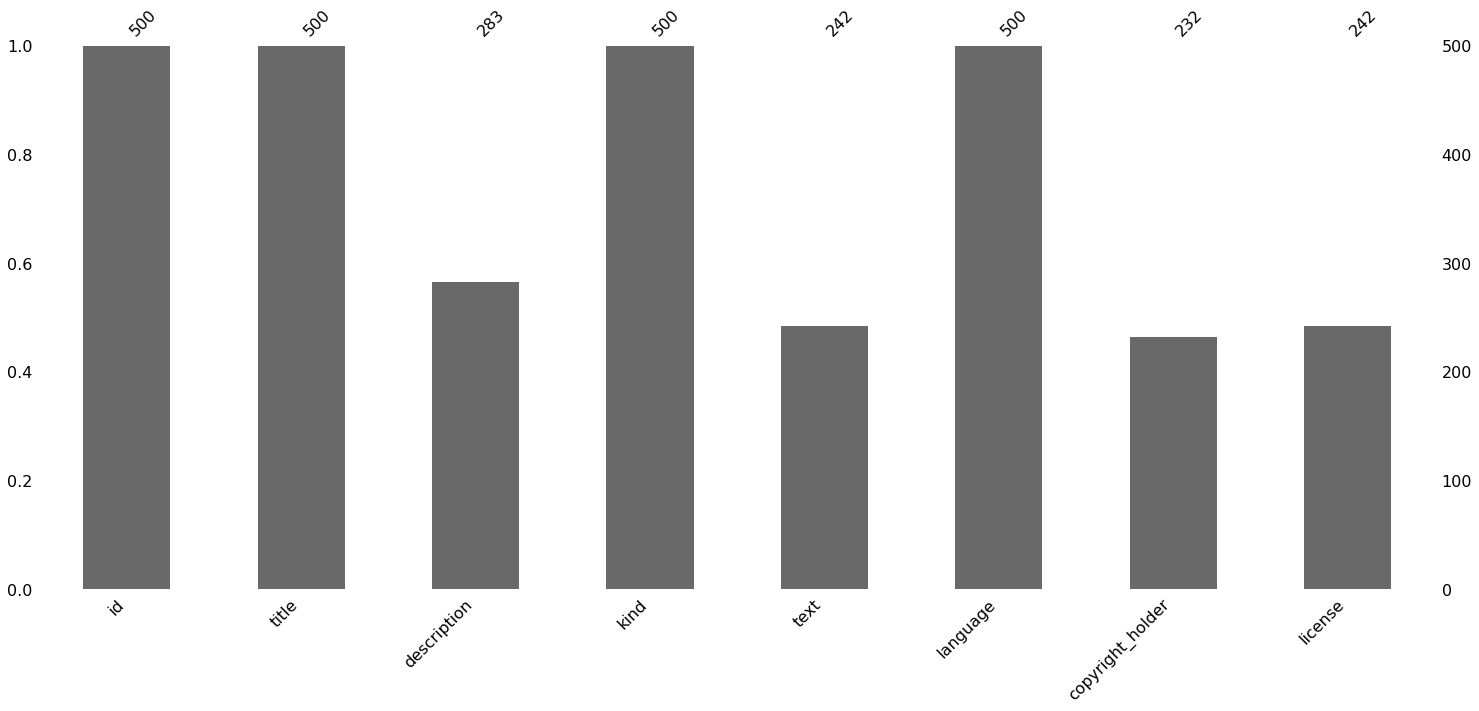

In [22]:
msno.bar(content_df.sample(500))

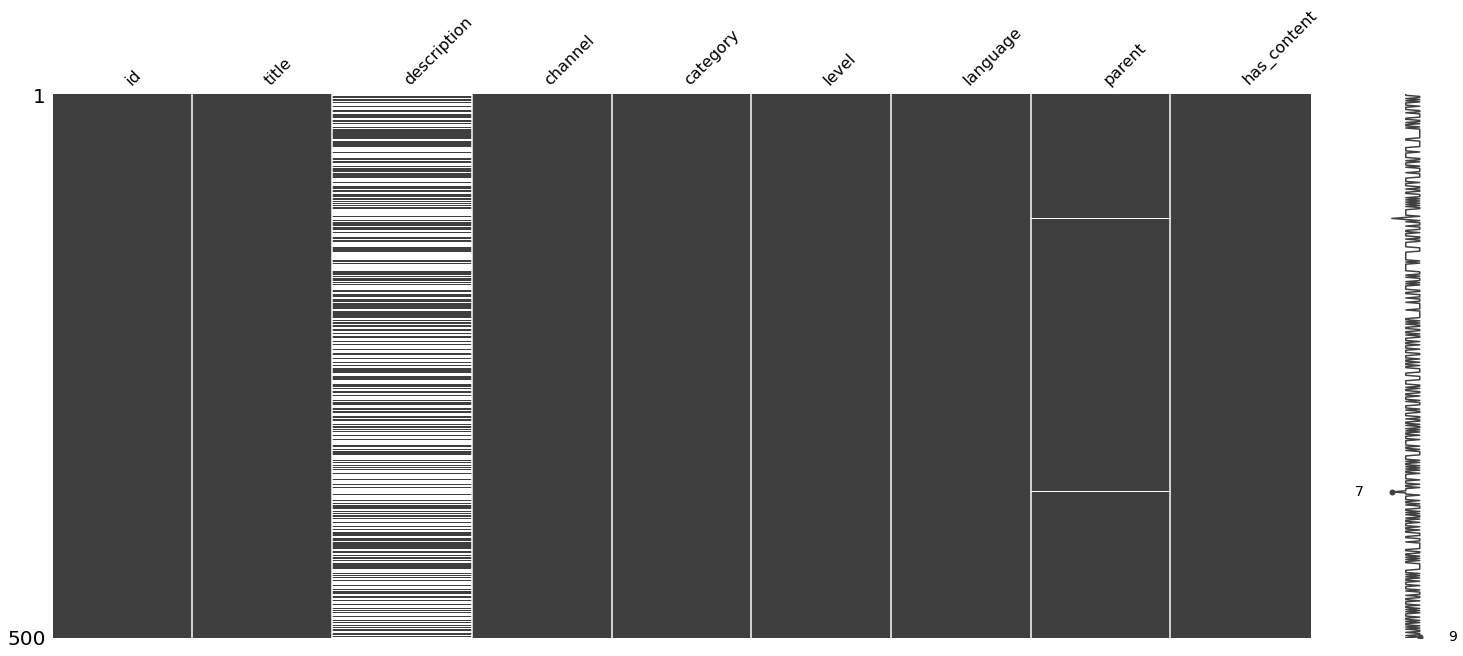

In [23]:
msno.matrix(topics_df.sample(500))

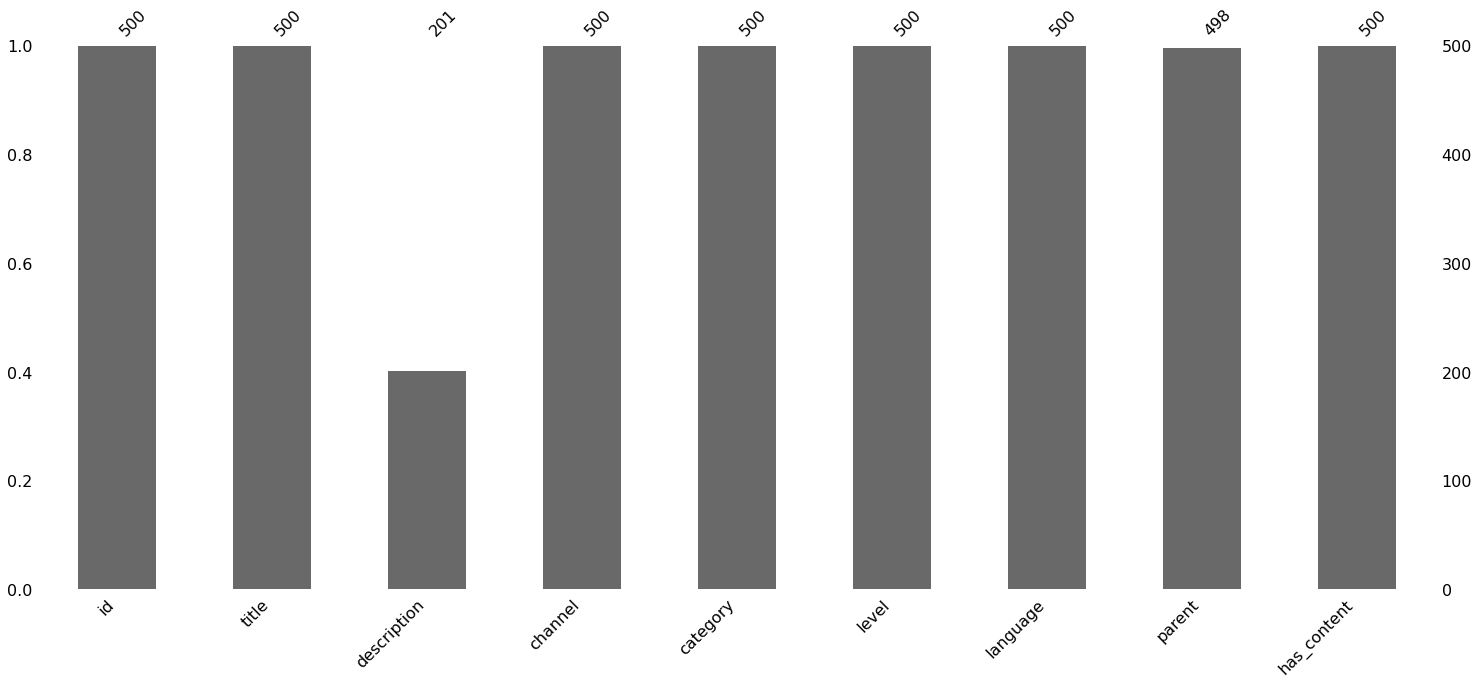

In [24]:
msno.bar(topics_df.sample(500))

### Value counts

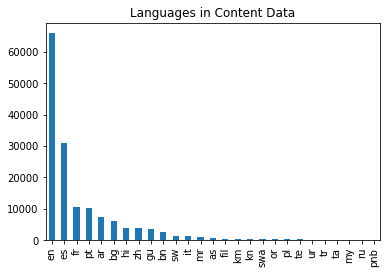

In [25]:
language_counts_content = content_df.language.value_counts()
language_counts_content.plot(kind="bar", title="Languages in Content Data")

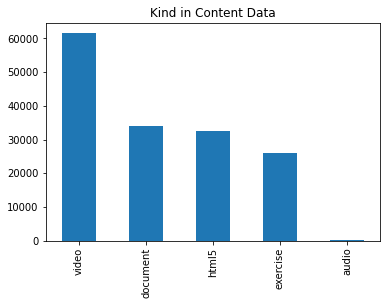

In [26]:
kind_counts_content = content_df.kind.value_counts()
kind_counts_content.plot(kind="bar", title="Kind in Content Data")

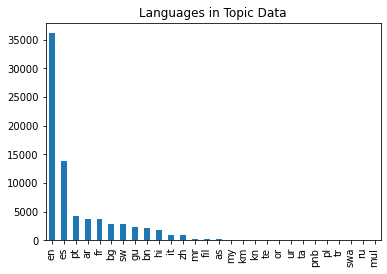

In [27]:
language_counts_topic = topics_df.language.value_counts()
language_counts_topic.plot(kind="bar", title="Languages in Topic Data")

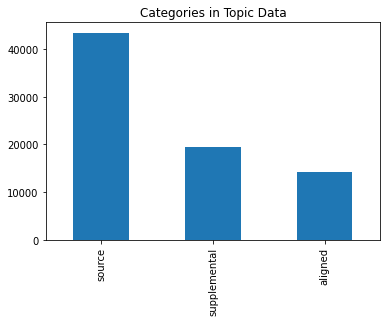

In [28]:
category_counts_topic = topics_df.category.value_counts()
category_counts_topic.plot(kind="bar", title="Categories in Topic Data")

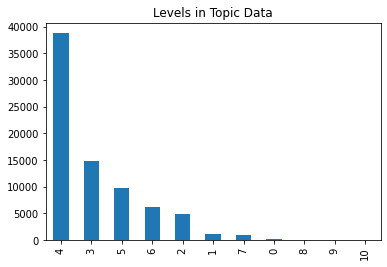

In [29]:
level_counts_topic = topics_df.level.value_counts()
level_counts_topic.plot(kind="bar", title="Levels in Topic Data")

In [30]:
# Top 5 most frequent channels/topic trees
channel_counts_topic = topics_df.channel.value_counts()
channel_counts_topic.sort_values(ascending=False).head(5)

fef095    5770
0ec697    5355
6e90a7    4554
2ee29d    4438
36a98b    3667
Name: channel, dtype: int64

In [31]:
topics_df.has_content.value_counts()

True     61517
False    15455
Name: has_content, dtype: int64

About 20% of the provided topics do not have any content

In [32]:
content_kinds = content_df.pivot(columns="kind", values=["id"])
content_kinds.head(3)

id                                        
kind audio document exercise html5           video
0      NaN      NaN      NaN   NaN  c_00002381196d
1      NaN      NaN      NaN   NaN  c_000087304a9e
2      NaN      NaN      NaN   NaN  c_0000ad142ddb

Only about 80% of the `topic_ids` have corresponding content

In [33]:
topics_with_content_df=topics_df[topics_df.has_content]
topics_with_content_df.head(3)

,id,title,description,channel,category,level,language,parent,has_content
0,t_00004da3a1b2,Откриването на резисторите,"Изследване на материали, които предизвикват на...",000cf7,source,4,bg,t_16e29365b50d,True
2,t_00068291e9a4,Entradas e saídas de uma função,Entenda um pouco mais sobre funções.,8e286a,source,4,pt,t_d14b6c2a2b70,True
3,t_00069b63a70a,Transcripts,NaN,6e3ba4,source,3,en,t_4054df11a74e,True


# Model to develop

The model we create is supposed to use the dataset of K-12 educational materials described earlier to predict which content items are best aligned to a given topic in a topic tree, with the goal of matching the selections made by curriculum experts and other users of the Kolibri Studio platform.

For each topic_id in the test set, we predict a space-delimited list of recommended content_ids for that topic. File should contain header and have following format:


```
topic_id,content_ids
t_00004da3a1b2,c_1108dd0c7a5d c_376c5a8eb028 c_5bc0e1e2cba0 c_76231f9d0b5e
t_00068291e9a4,c_639ea2ef9c95 c_89ce9367be10 c_ac1672cdcd2c c_ebb7fdf10a7e
t_00069b63a70a,c_11a1dc0bfb99
...
```



# NLP model for Curriculum Recommendation

## Updated Feature Selection 

In [34]:
X[0:5]

array([['c_1108dd0c7a5d'],
       ['c_376c5a8eb028'],
       ['c_5bc0e1e2cba0'],
       ['c_76231f9d0b5e'],
       ['c_639ea2ef9c95']], dtype='<U21')

In [35]:
y[0:5]

array([['t_00004da3a1b2'],
       ['t_00004da3a1b2'],
       ['t_00004da3a1b2'],
       ['t_00004da3a1b2'],
       ['t_00068291e9a4']], dtype='<U21')

In [36]:
content_df[content_df.id=="c_1108dd0c7a5d"]

,id,title,description,kind,text,language,copyright_holder,license
10216,c_1108dd0c7a5d,Молив като резистор,"Моливът причинява промяна в отклонението, подо...",video,NaN,bg,NaN,NaN


In [ ]:
"""
Add text features to the X array
"""
nlp_X = np.array([['placeholder', 'placeholder', 'placeholder', 'placeholder', '4', 'place','place']])
i = 0
while i<len(X[0:1000]):
  data_row=X[i].copy()
  content_id = X[i][0]

  content_data = content_df[content_df.id==content_id]
  # We dont want ids in test and train data, so remove 1st element of array 
  data_row[0] = content_data.title.values[0]
  #Add content desc
  data_row = np.append(data_row, content_data.description.values[0])
  #Add content language
  data_row = np.append(data_row, content_data.language.values[0])
  #Add content kind
  data_row = np.append(data_row, content_data.kind.values[0])
  #Add content text content
  data_row = np.append(data_row, content_data.text.values[0])
  #Add content copyright holder
  data_row = np.append(data_row, content_data.copyright_holder.values[0])
  #Add content license
  data_row = np.append(data_row, content_data.license.values[0])

  nlp_X = np.append(nlp_X,np.array([data_row]),axis=0)
  i+=1
nlp_X = nlp_X[1:]  #Remove the first element we added when creating array
nlp_X

array([['Молив като резистор',
        'Моливът причинява промяна в отклонението, подобно на ефекта при свързването на\nелектромагнит. Защо?\n\n',
        'bg', ..., 'nan', 'nan', 'nan'],
       ['Да чуем променливото ',
        'Тук чертаем линия на лист хартия и я използваме като променлив резистор,\nпоследователно свързан с високоговорител. Каква взаимовръзка чуваме? Звучи ли\nда е линейна?\n\n',
        'bg', ..., 'nan', 'nan', 'nan'],
       ['Променлив резистор (р',
        'Използваме сърцевината на молива (неговия графит), за да приложим различни\n„дължини молив“ към веригата. Каква взаимовръзка наблюдаваш между дължината на\nграфита и ъгъла на отклонение?\n\n',
        'bg', ..., 'nan', 'nan', 'nan'],
       ...,
       ["Règle de l'Hospital\xa0(",
        'La limite en 0 de (2sinx-sin2x)/(x-sinx).\n\n', 'fr', ...,
        'nan', 'nan', 'nan'],
       ['Règle de l’Hospital  ',
        "Déterminer les limites de fonctions exponentielles en utilisant la règle de l’Hospital ou l'

In [ ]:
topics_with_content_df[topics_with_content_df.id=='t_00004da3a1b2']

,id,title,description,channel,category,level,language,parent,has_content
0,t_00004da3a1b2,Откриването на резисторите,"Изследване на материали, които предизвикват на...",000cf7,source,4,bg,t_16e29365b50d,True


In [ ]:
"""
Add text features to the y array
"""
nlp_y = np.array([['placeholder', 'placeholder', 'placeholder', 'placeholder', '4', 'place']])
i = 0
while i<len(y[0:1000]):
  data_row=y[i].copy()
  topic_id = y[i][0]
  topic_data = topics_with_content_df[topics_with_content_df.id==topic_id]   

  # We dont want ids in test and train data, so remove 1st element of array 
  data_row[0] = topics_with_content_df.title.values[0]
  #Add topic desc
  data_row = np.append(data_row, topics_with_content_df.description.values[0])
  #Add topic language
  data_row = np.append(data_row, topics_with_content_df.language.values[0])
  #Add topic_category
  data_row = np.append(data_row, topic_data.category.values[0])
  #Add topic_channel
  data_row = np.append(data_row, topic_data.channel.values[0])
  #Add topic_level
  data_row = np.append(data_row, topic_data.level.values[0])

  nlp_y = np.append(nlp_y,np.array([data_row]),axis=0) 
  i+=1
nlp_y = nlp_y[1:]  #Remove the first element we added when creating array
nlp_y [0:3]

array([['Откриването на резист',
        'Изследване на материали, които предизвикват намаление в отклонението, когато се свържат последователно с нашия измервателен уред. ',
        'bg', 'source', '000cf7', '4'],
       ['Откриването на резист',
        'Изследване на материали, които предизвикват намаление в отклонението, когато се свържат последователно с нашия измервателен уред. ',
        'bg', 'source', '000cf7', '4'],
       ['Откриването на резист',
        'Изследване на материали, които предизвикват намаление в отклонението, когато се свържат последователно с нашия измервателен уред. ',
        'bg', 'source', '000cf7', '4']], dtype='<U130')

In [ ]:
len(nlp_X)

1000

In [ ]:
len(nlp_y)

1000

## Splitting dataset for NLP

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(nlp_X,nlp_y,test_size=1/5,random_state=0)
print(f"Sample training data X:\n {X_train[0:3]}")
print(f"Sample training data y:\n {y_train[0:3]}")

Sample training data X:
 [['Soluções de inequaçõe'
  'Considerando o gráfico de uma inequação linear com duas variáveis, verifique se um determinado par de valores é uma solução da inequação.'
  'pt' 'exercise' 'nan' 'nan' 'nan']
 ['Amas, vide, sommet, &'
  'Entraînez-vous à utiliser un nouveau vocabulaire pour décrire un diagramme de distribution.'
  'fr' 'exercise' 'nan' 'nan' 'nan']
 ['मीट्रिक सिस्टम(मापन प'
  'सैल बात करते हैं आयतन या क्षमता की मापन की इकाइयों के बारे में जैसे की\nमिलीलीटर और लीटर|\n\n'
  'hi' 'video' 'nan' 'nan' 'nan']]
Sample training data y:
 [['Откриването на резист'
  'Изследване на материали, които предизвикват намаление в отклонението, когато се свържат последователно с нашия измервателен уред. '
  'bg' 'source' 'f9b74f' '4']
 ['Откриването на резист'
  'Изследване на материали, които предизвикват намаление в отклонението, когато се свържат последователно с нашия измервателен уред. '
  'bg' 'source' 'c152d6' '4']
 ['Откриването на резист'
  'Изследване на ма

## Extracting features from text files

Next step, we extract the feature vectors from the raw text following the example in references [3]. We will use `sklearn`'s `CountVectorizer`.

In [ ]:
len(nlp_X.flatten())

7000

In [ ]:
#create feature vectors 
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer 
cv = CountVectorizer() 
tfidf = TfidfTransformer()
vectorized_X_train = cv.fit_transform(X_train.flatten())
vectorized_y_train = cv.fit_transform(y_train.flatten())
vectorized_X_test = cv.fit_transform(X_test.flatten())
vectorized_y_test = cv.fit_transform(y_test.flatten())

In [ ]:
vectorized_X_train.shape

(5600, 23838)

# Example NLP Model using `sklearn` dataset (ELEC 400M Final Report)

Before continuing working on our NLP model, we will work on a different end to end machine learning project using data that is already built into `sklearn`. The lessons learnt from building a project of lesser scope and complexity will be useful in the larger curriculum recommender project

This is a supervised learning problem. The machine learning general task here is *multi-class classification* (more specifically *a natural language processing classifier*). 

This is when we have a training dataset

> \begin{equation*}
  D =  {(x1,y1),(x2,y2),...,(xn,yn)}
\end{equation*}

trains a model to give us the target \begin{equation}
y
\end{equation}
which can be one of *K* different values. If *K*=2 such as in positive or negative sentiment analysis, it is referred to as binary classification.
>\begin{equation}
Y = {y1,y2,..,yk}
\end{equation}

## Relevant applications of NLP classifiers

Natural Language Processing (NLP) Classifiers are widely used in several industries. Some of these include: 

- Spam detection in emails

- Sentiment analysis in social media

- Topic detection in chatbots

The input, *x* for NLP classifiers is sequences of words. The dimensionality of this input is large and linearly proportional to the vocabulary size

The most popular algorithm in NLP classifiers is The Bag of Words and we will be using the same here. This algorithm represents raw text data as a bag or multiset of words where the frequency of occurrence of each word is used as a feature vector for training the model [5] 

Most popular methods of implementing NLP classifiers at the moment is using `naive Bayes`, `Support Vector Machines` and `Deep Learning`. We will be building a `naive Bayes` model and `SVM` model in this project

## Dataset

The dataset we will be using is the 20 Newsgroups text dataset collected by Ken Lang [6]. This dataset is a collection of about 18000 newsgroups posts on 20 topics split into a training dataset and a testing dataset. It is the most popular dataset for text classification and text clustering 


## Exploratory Data Analysis

`sklearn` comes with a loader that enables us to obtain the raw text data. Although, another loader exist for pre-processed data in form of feature vectors, we will not be using it for the learning experience.

Also, using the raw text data will allow us to have access to custom parameters that we can fine-tune to improve performance

In [37]:
from sklearn.datasets import fetch_20newsgroups 
newsgroups_train = fetch_20newsgroups(subset="train",shuffle=True)

The dataset consists of 20 files for each topic

In [38]:
newsgroups_train.filenames[0:5]

array(['/root/scikit_learn_data/20news_home/20news-bydate-train/rec.autos/102994',
       '/root/scikit_learn_data/20news_home/20news-bydate-train/comp.sys.mac.hardware/51861',
       '/root/scikit_learn_data/20news_home/20news-bydate-train/comp.sys.mac.hardware/51879',
       '/root/scikit_learn_data/20news_home/20news-bydate-train/comp.graphics/38242',
       '/root/scikit_learn_data/20news_home/20news-bydate-train/sci.space/60880'],
      dtype='<U86')

In [39]:
print(newsgroups_train.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







As you can see above, each post in the data consists of several sections. This is listed below:

- `From`

- `Subject`

- `Nntp-Posting-Host`

- `Organization`

- `nLines`

- The rest of content of the post follows

In [40]:
print(newsgroups_train.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


There are 20 different categories (referred to as `newsgroups` as shown above

In [41]:
newsgroups_train.filenames.shape

(11314,)

In [42]:
newsgroups_train.target.shape

(11314,)

### Data preprocessing - 20 Newsgroups feature selection

The input consists of sequences of words that are of varying length. Before we can use this raw text data, we need to first convert it into *d* dimensional numerical vectors. This will allow it to be fed into a machine learning algorithm since computers cannot understand text



One method to do this is using the `Bag of Words` model mentioned earlier. First we represent all words in the vocabulary of the training set as shown below
>\begin{equation}
V = {motoring, mohan,mongoose,atheism ...}
\end{equation}

We use the `Term Frequency times Inverse Document Frequency` (TFIDF) vectorizer from `sklearn` to create the vectors

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer 
tfid_vectorizer = TfidfVectorizer()
tfid_vectors_X = tfid_vectorizer.fit_transform(newsgroups_train.data)

In [44]:
non_zero_vectors = tfid_vectors_X.nnz/float(tfid_vectors_X.shape[0])
non_zero_vectors

157.9958458546933

There are only 157 non-zero vectors hence our data is very sparse

### Naive Bayes NLP model for 20 Newsgroups Data

 





There are two types of classification models: generative and disciminative models. Generative models model both input X and output Y, while discriminative models model only output Y given X [11]. A discriminative model would not be suitable for text classification like our problem since the data does not follow a normal distribution. It follows a discrete multinomial distribution

 Naive Bayes is a generative classification model. This is because it specifies a hypothetical random process to generate data. It uses the Bayes rule shown below  

>\begin{equation}
arg\:max_{y}\:log\:p\:(y|x) = arg\:max_{y}\:log\:\frac{p\:(x|y)\:p(y)} {p(x)} = arg\:max_{y}\:log\:p\:(x|y)\:p(y)
\end{equation}

Naive Bayes models are usually suitable for high dimensional data like ours.

There are several types of naive bayes models such as Gaussian Naive Bayes and Multinomial Naive Bayes. The difference is in the assumptions they make about data. For this project, the most suitable is Multinomial Naive Bayes which assumes the features are in a multinomial distribution. It describes probabilities of observing counts among a number of categories hence it is perfect for data with count rates like ours[10]. As described above, we pre-process the data to have words represented by their frequency in the raw data.

In [45]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB(alpha=0.01) 
nb_model = nb_model.fit(tfid_vectors_X,newsgroups_train.target)

In [46]:
# Load the test data
news_groups_test = fetch_20newsgroups(subset="test")
tfid_vectors_y = tfid_vectorizer.transform(news_groups_test.data)

In [47]:
nb_preds = nb_model.predict(tfid_vectors_y)

In [48]:
import numpy as np
np.mean(nb_preds==news_groups_test.target)

0.8352363250132767

In [49]:
from sklearn import metrics 
metrics.f1_score(news_groups_test.target,nb_preds,average="macro")

0.8290659644474043

In [50]:
#Implement this function following example in the sklearn documents, references [4]
def top_5_features(classifier,vectorizer):
  feature_names = np.asarray(vectorizer.get_feature_names())
  top_5 = np.argsort(classifier.coef_)[-5:]
  print(feature_names[top_5])

In [51]:
top_5_features(nb_model,tfid_vectorizer)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


[['hzrck' 'motoring' 'motoren' ... 'to' 'of' 'the']
 ['hzrck' 'mohan' 'mohammedans' ... 'of' 'to' 'the']
 ['hzrck' 'mongoose' 'mongers' ... 'to' 'of' 'the']
 ['hzrck' 'mouting' 'mouths' ... 'of' 'to' 'the']
 ['hzrck' 'mrlhzv' 'mrlhzrchzv' ... 'to' 'of' 'the']]


In [52]:
from sklearn.metrics import classification_report
print(classification_report(news_groups_test.target, nb_preds))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       319
           1       0.69      0.75      0.72       389
           2       0.74      0.63      0.68       394
           3       0.65      0.75      0.69       392
           4       0.83      0.84      0.83       385
           5       0.84      0.78      0.81       395
           6       0.82      0.78      0.80       390
           7       0.89      0.90      0.90       396
           8       0.93      0.96      0.95       398
           9       0.95      0.94      0.95       397
          10       0.95      0.97      0.96       399
          11       0.89      0.93      0.91       396
          12       0.79      0.77      0.78       393
          13       0.89      0.84      0.86       396
          14       0.87      0.91      0.89       394
          15       0.82      0.95      0.88       398
          16       0.76      0.91      0.83       364
          17       0.97    

 One disadvantage of naive bayesian classifiers is class conditional independence which impacts the model accuracy for highly correlated data[12]. However, our data is high-dimensional therefore this does not apply to us.

### Support Vector Machine Classifier for 20 Newsgroups Data

Support vector machines are suitable for a project like this because they work well with high-dimensional data like ours. This is because they are only affected by points close to the margins. in fact , data that may seem inseparable in lower dimensions might become separable after increasing its dimensionality [13].

In [53]:
from sklearn.svm import SVC 
svc_model = SVC(kernel="linear",C=1e10)
svc_model.fit(tfid_vectors_X,newsgroups_train.target)

KeyboardInterrupt: ignored

Using the SVC model takes relatively longer time to train (4 minutes). This is because SVC models scale with number of samples  $\mathcal{O}[N^2]$  and since our data has numerous samples (~20k), it requires a lot of computational resources [9]

We can improve this by using a stochastic gradient descent classifier to implement a linear SVM. This lowers the runtime to ~2 seconds

### Stochastic Gradient Descent Classifier for 20Newsgroups Data - SVM

A workaround to the intensive support vector machine's computationally intensive calculations is to use the gradient descent algorithm to iteratively find the optimal solution[14]. With $b$ as the batch size and $n$ as learning rate, we get the following equations for a stochastic gradient descent algorithm:

>${\theta}_{t+1} \: = {\theta}_{t}\: - ng\:{\theta}_{t}$ 

>with $g({\theta}_{t}\:) \: = \frac{1}{b}\: \sum_{i\subset}\: \Delta_{\theta} \: l\: (x_{i},\:\theta_{t})$

Stochastic Gradient Descent model on `sklearn` implements linear classifiers such as SVM and logistic regression with stochastic gradient descent. The `sklearn` model works best with sparse data. As we saw above, the data we're using is sparse making this a suitable model

We choose `hinge` loss so that the model implements a linear SVM

In [54]:
from sklearn.linear_model import SGDClassifier 
svm_model  = SGDClassifier(loss="hinge",penalty="l2",alpha=0.001,random_state=95)
svm_model.fit(tfid_vectors_X,newsgroups_train.target)

SGDClassifier(alpha=0.001, random_state=95)

In [55]:
svm_preds = svm_model.predict(tfid_vectors_y)

In [56]:
np.mean(svm_preds==news_groups_test.target)

0.8235528412108338

In [57]:
metrics.f1_score(news_groups_test.target,svm_preds,average="macro")

0.8101986195933588

In [58]:
top_5_features(svm_model,tfid_vectorizer)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[['atheism' 'nntp' 'host' ... 'christians' 'church' 'god']
 ['sandvik' 'clipper' 'encryption' ... 'firearms' 'guns' 'gun']
 ['god' 'jesus' 'christ' ... 'turkish' 'israeli' 'israel']
 ['gun' 'clipper' 'guns' ... 'kaldis' 'optilink' 'cramer']
 ['rutgers' 'keith' 'atheists' ... 'ch981' 'rosicrucian' 'sandvik']]


In [59]:
print(classification_report(news_groups_test.target, svm_preds))

              precision    recall  f1-score   support

           0       0.73      0.70      0.72       319
           1       0.80      0.70      0.75       389
           2       0.71      0.78      0.74       394
           3       0.74      0.67      0.70       392
           4       0.82      0.83      0.82       385
           5       0.84      0.76      0.80       395
           6       0.83      0.90      0.87       390
           7       0.91      0.89      0.90       396
           8       0.93      0.97      0.95       398
           9       0.89      0.89      0.89       397
          10       0.87      0.99      0.93       399
          11       0.83      0.96      0.89       396
          12       0.83      0.62      0.71       393
          13       0.88      0.85      0.87       396
          14       0.84      0.96      0.90       394
          15       0.74      0.94      0.83       398
          16       0.70      0.92      0.79       364
          17       0.91    

## Hyperparameter Tuning



To perform cross validation, we shuffle the dataset randomly and split the dataset into k groups. Here, we will take k=5, for 5 fold cross validation. For each group, we hold out one as the test set and use the remaining for training[11]. I decided to use k-fold cross validation instead of leave-one-out cross validation because it is faster to compute.

### Naive Bayes Grid Search - 5 Fold Cross Validation

We can use the grid search tool from `sklearn` to tune the SVM and Naive Bayes parameters. By default, grid search uses 5-fold cross validation but we can specify it using `cv=<int>`

In [60]:
from sklearn.model_selection import GridSearchCV
parameters = {
    "alpha":(0.01,0.001)
}

In [61]:
grid_search_nb_clf = GridSearchCV(nb_model,parameters,n_jobs=-1)
grid_search_nb_clf.fit(tfid_vectors_X,newsgroups_train.target)

GridSearchCV(estimator=MultinomialNB(alpha=0.01), n_jobs=-1,
             param_grid={'alpha': (0.01, 0.001)})

In [62]:
grid_search_nb_clf.best_score_ 

0.911171879303898

In [63]:
grid_search_nb_clf.best_params_

{'alpha': 0.01}

Using grid search's cross validation to optimize the alpha parameter for our naive bayes classifier increases our score from 82.9% to 91.1%

### *SVM* Grid Search - 5 Fold Cross Validation

In [64]:
svm_model.get_params()

{'alpha': 0.001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': 95,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [65]:
grid_search_svm_clf = GridSearchCV(svm_model,parameters,n_jobs=-1)
grid_search_svm_clf.fit(tfid_vectors_X,newsgroups_train.target)

GridSearchCV(estimator=SGDClassifier(alpha=0.001, random_state=95), n_jobs=-1,
             param_grid={'alpha': (0.01, 0.001)})

In [66]:
grid_search_svm_clf.best_score_

0.8889869046237614

In [67]:
grid_search_svm_clf.best_params_

{'alpha': 0.001}

In [68]:
# grid_search_svm_clf.get_params()

Using grid search's cross validation  to optimize the alpha parameter for our naive bayes classifier increases our score from 81.0% to 88.9%

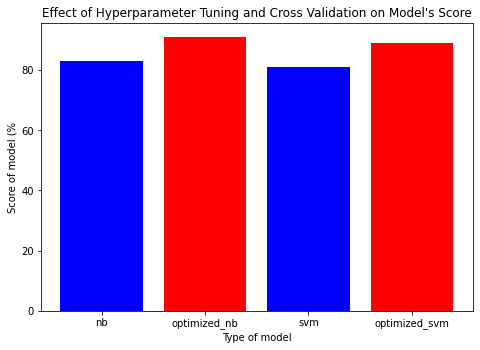

In [69]:
import matplotlib.pyplot as plt 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
data = ['nb','optimized_nb','svm','optimized_svm']
scores = [82.9,91.1,81.0,88.9]
ax.bar(data,scores,color=["blue","red"])
plt.xlabel("Type of model") 
plt.ylabel("Score of model (%")
ax.set_title ( "Effect of Hyperparameter Tuning and Cross Validation on Model's Score")
plt.show()

### Training pipeline

To be able to quickly test different versions of models, we can create a pipeline using`sklearn`'s `make_pipeline`. First, we will implement a very simple naive bayes model with the default parameters producing a simple probabilistic model of the frequency of words

In [70]:
# References code in Python Data Science Hanbook [10]
from sklearn.pipeline import make_pipeline 
nb_pipeline_model = make_pipeline(TfidfVectorizer(), MultinomialNB())
svm_pipeline_model = make_pipeline(TfidfVectorizer(), SGDClassifier())

In [71]:
# X_train = tfid_vectors_X
X_train = newsgroups_train.data
y_train = newsgroups_train.target
nb_pipeline_model.fit(X_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [72]:
X_test = news_groups_test.data
y_test = news_groups_test.target
nb_pipeline_preds = nb_pipeline_model.predict(X_test)

In [73]:
# Build prediction function using this model [10]
def predict(string,X_train = newsgroups_train, model = nb_pipeline_model):
  prediction = model.predict([string])
  return X_train.target_names[prediction[0]]

In [74]:
predict("Canada")

'rec.sport.hockey'

## Future considerations

Some options we can do to improve the model is 
- Filtering common words such as articles 'a', 'an' and 'the'. When we looked at the `top_5_features` function, both 'to' and 'for' were in each of the top 5 so filtering them would improve performance
- Further preprocessing the data to only keep the word roots. For example, mapping both 'happily' and 'happiness' to happy [7]

## Export Notebook to PDF

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain

In [ ]:
!pwd

/content


In [ ]:
!cd drive/MyDrive/A_ELEC_UBC/Year4/Elec400m/'Final Report'/Code && ls

 ClassExamples	 Data  'ELEC 400M Final Report Jupyter Notebook'


In [ ]:
!cp drive/MyDrive/A_ELEC_UBC/Year4/Elec400m/'Final Report'/Code/'ELEC 400M Final Report Jupyter Notebook'  ./

In [ ]:
#Note that image of soma server in the background section causes an error in download,
# so comment that out first before converting to pdf
!jupyter nbconvert --to PDF "ELEC 400M Final Report Jupyter Notebook"

[NbConvertApp] Converting notebook ELEC 400M Final Report Jupyter Notebook to PDF
[NbConvertApp] Support files will be in ELEC 400M Final Report Jupyter Noteboo_files/
[NbConvertApp] Making directory ./ELEC 400M Final Report Jupyter Noteboo_files
[NbConvertApp] Making directory ./ELEC 400M Final Report Jupyter Noteboo_files
[NbConvertApp] Making directory ./ELEC 400M Final Report Jupyter Noteboo_files
[NbConvertApp] Making directory ./ELEC 400M Final Report Jupyter Noteboo_files
[NbConvertApp] Making directory ./ELEC 400M Final Report Jupyter Noteboo_files
[NbConvertApp] Making directory ./ELEC 400M Final Report Jupyter Noteboo_files
[NbConvertApp] Making directory ./ELEC 400M Final Report Jupyter Noteboo_files
[NbConvertApp] Making directory ./ELEC 400M Final Report Jupyter Noteboo_files
[NbConvertApp] Making directory ./ELEC 400M Final Report Jupyter Noteboo_files
[NbConvertApp] Writing 210112 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times:

# References 

[1] References "Learning Equality - Curriculum Recommendations." (2022). Retrieved from https://kaggle.com/competitions/learning-equality-curriculum-recommendations

[2] References "Using Missingno to Diagnose Data Sparsity." (2022). Retrieved from https://www.kaggle.com/code/residentmario/using-missingno-to-diagnose-data-sparsity 

[3] References "Machine Learning, NLP: Text Classification using scikit-learn, python and NLTK." (2017). Retrieved from https://towardsdatascience.com/machine-learning-nlp-text-classification-using-scikit-learn-python-and-nltk-c52b92a7c73a

[4] References "The 20 newsgroups text dataset" . (2022). Retrieved from https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html 

[5] References "Bag-of-words model". (2022). Retrieved from https://en.wikipedia.org/wiki/Bag-of-words_model 

[6] References "20 Newsgroups"  http://qwone.com/~jason/20Newsgroups/ 

[7] References "Naive Baise Lecture 8 Slides". (2022). Retrieved from https://canvas.cornell.edu/files/2122690/download?download_frd=1 

[8] References "sklearn.linear_model.SGDClassifier". (2022). Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

[9] References "University of British Columbia's ELEC 400M Class Code Examples - SVM". (2022). Xiaoxiao Li.

[10] References "Python Data Science Handbook". (2016). Jake Vanderplas. O'Reilly Media. 

[11] References "University of British Columbia's ELEC 400M Lecture 6: Model Evaluation and Training". (2022). Xiaoxiao Li.  

[12] References "University of British Columbia's ELEC 400M Lecture 7: Naive Bayesian Classifier". (2022). Xiaoxiao Li.  

[13] References "University of British Columbia's ELEC 400M Lecture 9: Support Vector Machines 2". (2022). Xiaoxiao Li. 

[14] References "University of British Columbia's ELEC 400M Lecture 17: Neural Network Basis". (2022). Xiaoxiao Li.